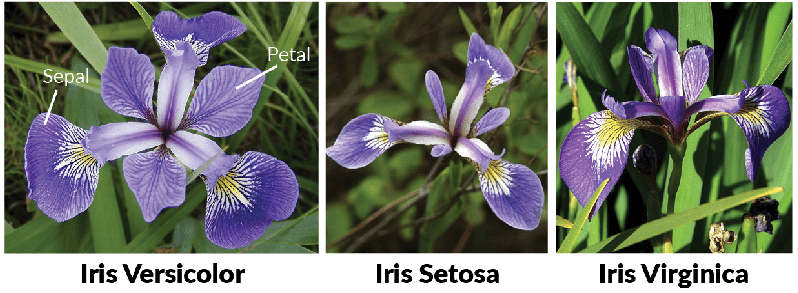

Подключение необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

Загрузка датасета

In [ ]:
iris = load_iris()
# convert to pandas df
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
# print dataset size
print(f"Размер датасета: {df.shape}")

Получение информации о датасете

In [ ]:
print(df.info())

Получение статистической информации о датасете

In [ ]:
print(df.describe())

Распределение целевой переменной

In [ ]:
print(df['target'].value_counts())

Визуализация распределения признаков и целевых переменных

In [ ]:
sns.pairplot(df, hue='target', markers=["o", "s", "D"])
plt.show()

In [ ]:
df.hist(bins=20, figsize=(10,10))
plt.show()

Разделение датасета на обучающую и тестовую выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

Вспомогательная функция для визуализации

In [ ]:
def visualize_knn(X, y, n_neighbors):
    h = .02  # шаг сетки для визуализации

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for n in n_neighbors:
        # Обучение модели
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X, y)

        # Визуализация пределов классификатора
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Нанесение на график точек обучающего набора
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"3-Class classification (k = {n})")
        plt.show()

Вспомогательная функция для оценки точности классификатора

In [ ]:
def evaluate_knn(n_neighbors):
    for n in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        Y_pred = knn.predict(X_test)
        print(f'Accuracy for k={n}: {accuracy_score(y_test, Y_pred)}')

Визуализация разделяющей поверхности в пространстве первых 2 признаков ("sepal length" и "sepal width")

In [ ]:
X_2D = iris.data[:, :2]
Y_train = iris.target

n_neighbors = [3]
evaluate_knn(n_neighbors)
visualize_knn(X_2D, Y_train, n_neighbors)

Пример работы KNN классификатора на синтетическом датасете

In [ ]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

1. `n_samples=500`: Количество объектов  в сгенерированном датасете.
2. `n_features=2`: Количество признаков в данном наборе данных.
3. `n_informative=2`: Количество информативных признаков.
4. `n_redundant=0`: Количество признаков, которые являются линейными комбинациями информативных признаков.
5. `n_clusters_per_class=1`: Количество кластеров на каждый класс.
6. `random_state=42`: Параметр, обеспечивающий воспроизводимость результатов.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=['Feature 1', 'Feature 2', 'Target'])
sns.pairplot(df, hue='Target', diag_kind='kde')
plt.show()

In [ ]:
k_values = range(1, 21)
accuracy_non_weighted = []
accuracy_weighted = []

In [ ]:
for k in k_values:
    knn_non_weighted = KNeighborsClassifier(n_neighbors=k)
    knn_non_weighted.fit(X_train, y_train)
    y_pred_non_weighted = knn_non_weighted.predict(X_test)
    accuracy_non_weighted.append(accuracy_score(y_test, y_pred_non_weighted))

    knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_weighted.fit(X_train, y_train)
    y_pred_weighted = knn_weighted.predict(X_test)
    accuracy_weighted.append(accuracy_score(y_test, y_pred_weighted))


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_non_weighted, label='Non-weighted KNN', marker='o')
plt.plot(k_values, accuracy_weighted, label='Weighted KNN', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors for KNN')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def plot_decision_boundaries(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=20)
    ax.set_title(title)

In [ ]:
k_values = range(1, 6)
k_values = [1,3,5,10]
accuracy_scores = []

fig, axes = plt.subplots(2,2)#, figsize=(20, 16))
axes = axes.flatten()

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

    # Plotting decision boundary
    plot_decision_boundaries(X_test, y_test, knn, axes[i], f"k = {k}")

print(accuracy_scores)
plt.tight_layout()
plt.show()